[[ 97   1   1]
 [112   1   1]
 [127   4   1]
 [127   4   1]
 [127   4   1]
 [127   2   1]
 [126   3   1]
 [111   3  -1]]


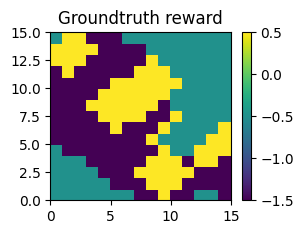

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics as stats
import os

import irl.deep_maxent_list as deep_maxent
import irl.mdp.objectworld as objectworld
from irl.value_iteration import find_policy

ow = objectworld.Objectworld(15, 25, 2, 0.3, 0.90)
ground_r = np.array([ow.reward(s) - 0.5 for s in range(ow.n_states)])

plt.subplot(2, 2, 1)
plt.pcolor(ground_r.reshape((15, 15)))
plt.colorbar()

plt.title("Groundtruth reward")
plt.savefig('fig/Groundtruth reward',dpi=300)

policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
tra = ow.generate_trajectories(40,8,lambda s: policy[s])
print(tra[0])

# grid_size= 25, 
#          discount= 0.93, 
#          n_objects= 30, 
#          n_colours= 2, 
#          n_trajectories= 40, 
#          epochs= 120, 
#          learning_rate= 0.01, 
#          structure= (4, 4))

In [2]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Your existing code...

# # Plotting the groundtruth reward
# plt.figure(figsize=(8, 8))

# # plt.subplot(2, 2, 1)
# # plt.pcolor(ground_r.reshape((15, 15)))
# # plt.colorbar()
# # plt.title("Groundtruth reward")

# # Given trajectory data
# trajectory_data = tra[13]

# # Plotting the trajectory
# x_values = [0.5 + (state[0] % 15) for state in trajectory_data]  # Shifting x-coordinates to block centers
# print(x_values)
# y_values = [0.5 + (state[0] // 15) for state in trajectory_data]  # Shifting y-coordinates to block centers
# print(y_values)
# plt.subplot(2, 2, 1)
# plt.pcolor(ground_r.reshape((15, 15)))  # Assuming ground_r is the same for trajectory visualization
# # plt.plot(x_values, y_values, marker='o', linestyle='-', color='r')
# plt.title("Object's Trajectory")

# # Adding directional arrows based on movement direction
# for i in range(len(trajectory_data)):
#     x = x_values[i]
#     y = y_values[i]
#     direction = trajectory_data[i][1]
#     print(direction)

#     if direction == 1:  # Move Up
#         dx, dy = 0, 1
#     elif direction == 0:  # Move Right
#         dx, dy = 1, 0
#     elif direction == 3:  # Move Down
#         dx, dy = 0, -1
#     elif direction == 2:  # Move Left
#         dx, dy = -1, 0
#     else:
#         dx, dy = 0,0

#     plt.arrow(x, y, dx * 0.4, dy * 0.4, head_width=0.2, head_length=0.2, fc='red', ec='red')

# plt.tight_layout()
# plt.savefig('fig/Trajectory_with_arrows', dpi=300)
# plt.show()


In [13]:
"""
Run maximum entropy inverse reinforcement learning on the objectworld MDP.

Matthew Alger, 2015
matthew.alger@anu.edu.au
"""

# import numpy as np
# import matplotlib.pyplot as plt
# import time

# import irl.deep_maxent_list as deep_maxent
# import irl.mdp.objectworld as objectworld
# from irl.value_iteration import find_policy

avr_arr =[]
arr1 =[]
arr2 =[]
arr3 =[]
arr4 =[]
arr5 =[]
arr_mean =[]
arr_median =[]
arr_sum_0 =[]
# arr_norm_avr =[]
folder = 0


def main10(grid_size, discount, n_objects, n_colours, n_trajectories, epochs,
         learning_rate, structure,tra):
    """
    Run deep maximum entropy inverse reinforcement learning on the objectworld
    MDP.

    Plots the reward function.

    grid_size: Grid size. int.
    discount: MDP discount factor. float.
    n_objects: Number of objects. int.
    n_colours: Number of colours. int.
    n_trajectories: Number of sampled trajectories. int.
    epochs: Gradient descent iterations. int.
    learning_rate: Gradient descent learning rate. float.
    structure: Neural network structure. Tuple of hidden layer dimensions, e.g.,
        () is no neural network (linear maximum entropy) and (3, 4) is two
        hidden layers with dimensions 3 and 4.
    """
    num = 1
    while True:
        folder_exist = os.path.exists(f'fig/single{num}')
        if not folder_exist:
            os.makedirs(f'fig/single{num}')
            os.makedirs(f'fig/each{num}')
            break
        num += 1
    folder = num
    os.makedirs(f'fig/process{folder}')
    
    wind = 0.3
    trajectory_length = 8
    l1 = l2 = 0

#     ow = objectworld.Objectworld(grid_size, n_objects, n_colours, wind,
#                                  discount)
#     ground_r = np.array([ow.reward(s) for s in range(ow.n_states)])
    policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
    trajectories = tra
    tra = trajectories
#     trajectories1 = ow.generate_trajectories(n_trajectories,
#                                             trajectory_length,
#                                             lambda s: policy[s])
#     trajectories2 = ow.generate_trajectories(n_trajectories,
#                                             trajectory_length,
#                                             lambda s: policy[s])
#     trajectories3 = ow.generate_trajectories(n_trajectories,
#                                             trajectory_length,
#                                             lambda s: policy[s])
#     trajectories4 = ow.generate_trajectories(n_trajectories,
#                                             trajectory_length,
#                                             lambda s: policy[s])
#     trajectories5 = ow.generate_trajectories(n_trajectories,
#                                             trajectory_length,
#                                             lambda s: policy[s])
    trajectories1 = trajectories[0:15]
    trajectories2 = trajectories[15:30]
    trajectories3 = trajectories[30:45]
    trajectories4 = trajectories[45:60]
    trajectories5 = trajectories[60:75]

    feature_matrix = ow.feature_matrix(discrete=False)
    
    # doing the 10 independent deep maxent irl
#     start_time = time.time()
    ro1 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories1, epochs,
        learning_rate, l1=l1, l2=l2)
    ro2 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories2, epochs,
        learning_rate, l1=l1, l2=l2)
    ro3 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories3, epochs,
        learning_rate, l1=l1, l2=l2)
    ro4 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories4, epochs,
        learning_rate, l1=l1, l2=l2)
    ro5 = deep_maxent.irl((feature_matrix.shape[1],) + structure, feature_matrix,
        ow.n_actions, discount, ow.transition_probability, trajectories5, epochs,
        learning_rate, l1=l1, l2=l2)
    
    t = 0
    time_of_10 = 0
    
    # process in each epochs
    for i in range(epochs):
        print(i)
        r1 = ro1[i]
        r2 = ro2[i]
        r3 = ro3[i]
        r4 = ro4[i]
        r5 = ro5[i]

        r = (r1+r2+r3+r4+r5)/5
    #     r = r1
    
        # normalization
        min_val = np.min(r)
        max_val = np.max(r)
        r = ((2 * (r - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r1)
        max_val = np.max(r1)
        r1 = ((2 * (r1 - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r2)
        max_val = np.max(r2)
        r2 = ((2 * (r2 - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r3)
        max_val = np.max(r3)
        r3 = ((2 * (r3 - min_val)) / (max_val - min_val)) - 1 

        min_val = np.min(r4)
        max_val = np.max(r4)
        r4 = ((2 * (r4 - min_val)) / (max_val - min_val)) - 1 
        
        min_val = np.min(r5)
        max_val = np.max(r5)
        r5 = ((2 * (r5 - min_val)) / (max_val - min_val)) - 1 
        
        plt.tight_layout()

        ### plot reward each 10 epochs
        if t == 10:
            plt.subplot(2, 2, 1)
            plt.pcolor(ground_r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Groundtruth reward")
            #single
            plt.subplot(2, 2, 2)
            plt.pcolor(r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Recovered_average reward")
            plt.savefig(f'fig/process{folder}/{time_of_10}',dpi=300)
            plt.show()
            t = 0
            time_of_10+=1
        else:
            t += 1
            
        if i == epochs-1:
            plt.subplot(2, 2, 1)
            plt.pcolor(ground_r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Groundtruth reward")
            #single

            plt.subplot(2, 2, 2)
            plt.pcolor(r.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("Recovered_average reward")
            plt.savefig(f'fig/single{folder}/1',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r1.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("1 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r2.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("2 reward")
            plt.savefig(f'fig/each{folder}/1',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r3.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("3 reward")
            
            plt.subplot(2, 2, 2)
            plt.pcolor(r4.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.title("4 reward")
            plt.savefig(f'fig/each{folder}/2',dpi=300)
            plt.show()
            
            plt.subplot(2, 2, 1)
            plt.pcolor(r5.reshape((grid_size, grid_size)))
            plt.colorbar()
            plt.savefig(f'fig/each{folder}/3',dpi=300)
            plt.title("5 reward")


        r_norm_avr=(r1+r2+r3+r4+r5)/5
    
        # Initialize loss computer
        sum_un_avr = 0
        sum_avr = 0
        sum_norm_avr = 0
        sum_ = 0
        sum_1 =0
        sum_2=0
        sum_3=0
        sum_4=0
        sum_5=0

        sum_normal=0

        # Compute loss
        for x in range(len(ground_r)):
            i = ground_r[x]
            
            #avr's loss
            sum_avr += (r[x]-i)**2
            
            #each independent's loss
            sum_1 += (r1[x]-i)**2
            
            sum_2 += (r2[x]-i)**2
           
            sum_3 += (r3[x]-i)**2
            
            sum_4 += (r4[x]-i)**2
            
            sum_5 += (r5[x]-i)**2

            sum_normal += i**2
            
        avr_arr.append(sum_avr)
        
        arr_sum_0.append(sum_normal)
        
        arr1.append(sum_1)
        arr2.append(sum_2)
        arr3.append(sum_3)
        arr4.append(sum_4)
        arr5.append(sum_5)

        datas = [sum_1,sum_2,sum_3,sum_4,sum_5]
        arr_mean.append(stats.mean(datas))
        arr_median.append(stats.median(datas))
        
        #print each losses including mean, median and avr 
        print(f'avr: {sum_avr}')
        print(f'norm_avr: {sum_norm_avr}')
        print('each:')
        print(sum_1)
        print(sum_2)
        print(sum_3)
        print(sum_4)
        print(sum_5)

        print(stats.mean(datas))
        print(stats.median(datas))
        print(sum_normal)

        print('---------------------')
        
        #last epoch output the result compare to mean and median
        if i == epochs-1:
            print(sum_avr/stats.mean(datas))
            print(sum_avr/stats.median(datas))

In [4]:
tra = ow.generate_trajectories(75,8,lambda s: policy[s])

0
avr: 300.54558708149153
norm_avr: 0
each:
375.0955982958045
244.32359816767968
172.40151463095884
227.00236104034462
577.1089607815234
319.1864065832622
244.32359816767968
228.25
---------------------
1
avr: 295.7277817320351
norm_avr: 0
each:
363.4995639908844
259.30287786943353
174.02343850555067
218.90681296995953
572.7203531526728
317.6906092977002
259.30287786943353
228.25
---------------------
2
avr: 293.1166412569915
norm_avr: 0
each:
351.99411232577233
254.64540980647388
175.8791304101559
212.69827147231513
568.4731004768005
312.73800489830353
254.64540980647388
228.25
---------------------
3
avr: 289.8845554785811
norm_avr: 0
each:
340.6260939116445
253.64724804207742
177.54160901560243
205.77375483426104
564.3954315319522
308.3968274671075
253.64724804207742
228.25
---------------------
4
avr: 287.3324670093106
norm_avr: 0
each:
329.40409181797344
254.5848788077536
179.35066147140319
199.6217265308278
560.5147477443667
304.6952212744649
254.5848788077536
228.25
------------

/tmp/ipykernel_96452/3269846331.py:151: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


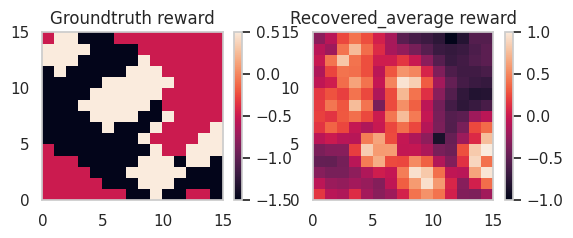

avr: 262.75210773941694
norm_avr: 0
each:
263.8453319129597
280.35725684717437
198.34130844904124
166.27645405728063
551.9185103898863
292.1477723312684
263.8453319129597
228.25
---------------------
11
avr: 262.0080696558102
norm_avr: 0
each:
253.05743830708653
282.3557689542521
204.21734694356803
162.2734477135623
554.4259331057657
291.2659870048469
253.05743830708653
228.25
---------------------
12
avr: 262.9374177074661
norm_avr: 0
each:
242.16186737497216
285.0192445723199
210.37724433803012
160.1612309713625
556.6739824063734
290.8787139326116
242.16186737497216
228.25
---------------------
13
avr: 264.3359177493156
norm_avr: 0
each:
231.05756758939987
290.4891937167309
216.81425227086018
157.97244456892295
559.2214618220197
291.11098399358673
231.05756758939987
228.25
---------------------
14
avr: 265.84283122701635
norm_avr: 0
each:
219.53189308888827
295.2008765013913
223.5599248048181
156.08438612543281
562.049342078027
291.2852845197115
223.5599248048181
228.25
-------------

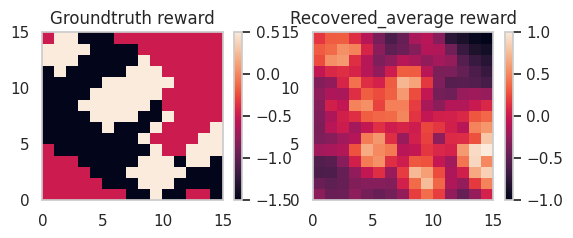

avr: 214.5090665830563
norm_avr: 0
each:
250.9248251208233
316.3457459507453
274.76848534738343
150.1731584541677
587.1228627395014
315.86701552252424
274.76848534738343
228.25
---------------------
22
avr: 215.77601708772244
norm_avr: 0
each:
280.13760175565403
313.5807386301101
284.3412464448186
150.886145279985
588.4045124333119
323.47004890877594
284.3412464448186
228.25
---------------------
23
avr: 218.20629970650162
norm_avr: 0
each:
283.5430913253054
306.5994199986003
293.0535791447348
152.6119981837557
591.259847609024
325.413587252284
293.0535791447348
228.25
---------------------
24
avr: 219.98608669456613
norm_avr: 0
each:
279.79690030589296
301.71752343116265
302.9565691524421
153.01911905393928
594.1580379012042
326.32962996892826
301.71752343116265
228.25
---------------------
25
avr: 223.35891283933287
norm_avr: 0
each:
276.0229928476522
296.64606817136377
313.00669972626997
155.18643994695847
597.3874779770485
327.64993573385857
296.64606817136377
228.25
--------------

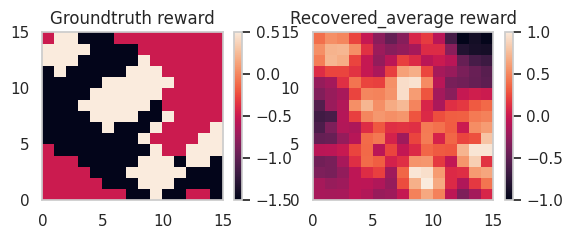

avr: 226.68599142844562
norm_avr: 0
each:
231.36022899715215
253.16270789871456
373.78573079847996
170.3926220180727
613.8586904985461
328.5119960421931
253.16270789871456
228.25
---------------------
33
avr: 227.5973139910067
norm_avr: 0
each:
236.67189180128747
252.7127281669447
369.89399270354676
173.30406966688355
615.2091959528617
329.55837565830484
252.7127281669447
228.25
---------------------
34
avr: 226.08449149510432
norm_avr: 0
each:
234.4393933476564
243.55378220969484
365.89239796196546
177.71184911728312
612.8341723053122
326.8863189883824
243.55378220969484
228.25
---------------------
35
avr: 221.91957336620226
norm_avr: 0
each:
239.01962049564113
234.5588533870496
361.77136849237917
182.29208022154484
609.9488991069818
325.5181643407193
239.01962049564113
228.25
---------------------
36
avr: 217.7981712277086
norm_avr: 0
each:
237.28653071695157
228.8933077823091
357.0866497872344
185.37577961612678
606.4841434056837
323.0252822616611
237.28653071695157
228.25
--------

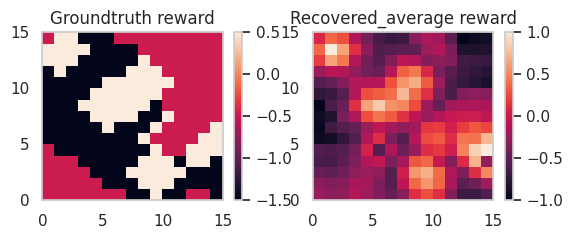

avr: 134.54512793478088
norm_avr: 0
each:
258.03529257795833
209.98202879049325
329.10486469297973
210.8009932830219
397.52471537216337
281.0895789433233
258.03529257795833
228.25
---------------------
44
avr: 131.87864849843106
norm_avr: 0
each:
263.8188509236927
203.12239842874823
325.6474529966416
214.79555848243126
385.036947718402
278.48424170998317
263.8188509236927
228.25
---------------------
45
avr: 132.70098514587724
norm_avr: 0
each:
261.2383945233701
204.3838382212701
322.24430783458394
218.68259986800905
369.3773912739835
275.1853063442434
261.2383945233701
228.25
---------------------
46
avr: 133.53545875936447
norm_avr: 0
each:
261.7423760844513
202.04893317096398
318.78661558607587
222.45719496571164
335.8357758025444
268.1741791219494
261.7423760844513
228.25
---------------------
47
avr: 133.97013781625392
norm_avr: 0
each:
257.4737471834159
196.55758057618
315.475983621701
226.11813194109138
330.74354090723716
265.27379684592506
257.4737471834159
228.25
-------------

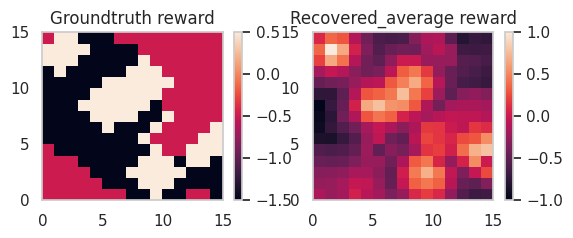

avr: 131.07640967227496
norm_avr: 0
each:
210.79456611506555
176.35388655661149
259.94261653640075
244.65208354082506
246.04219986145148
227.55707052207086
244.65208354082506
228.25
---------------------
55
avr: 135.06947822671773
norm_avr: 0
each:
205.47191739037166
170.58814418840254
254.7089589249698
239.34956935369794
324.66933092337877
238.95758415616413
239.34956935369794
228.25
---------------------
56
avr: 126.08162206095011
norm_avr: 0
each:
202.99896199387328
168.78353439052702
249.36322170703454
238.64477325213858
181.00644491025668
208.15938725076603
202.99896199387328
228.25
---------------------
57
avr: 130.91986233452647
norm_avr: 0
each:
201.13773358046805
165.74923633091643
245.9555044116539
237.99930834974163
249.09168579052854
219.9866936926617
237.99930834974163
228.25
---------------------
58
avr: 132.542929317288
norm_avr: 0
each:
198.73773001069642
162.63990985306648
237.2395287600485
230.41879335007144
265.1488827474012
218.83696894425682
230.41879335007144
228.

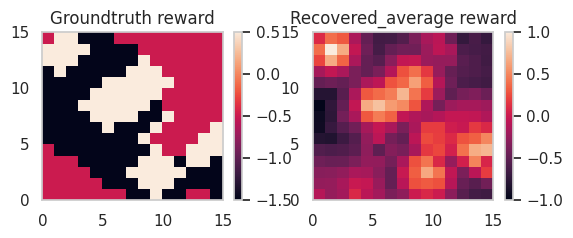

avr: 127.31874280417448
norm_avr: 0
each:
177.6704608917449
144.69971316913495
194.48626018383948
238.5052954220405
150.68261213681618
181.2088683607152
177.6704608917449
228.25
---------------------
66
avr: 131.16134695000125
norm_avr: 0
each:
173.9226450608758
147.80465450605152
192.6136334957266
238.23917982544287
221.45095791773863
194.80621416116708
192.6136334957266
228.25
---------------------
67
avr: 135.77380534716337
norm_avr: 0
each:
173.74892040136268
148.3452255913263
195.474820777582
242.24468785363675
277.1932077269964
207.40137247018083
195.474820777582
228.25
---------------------
68
avr: 126.01255300682209
norm_avr: 0
each:
166.23521912195048
148.36842874516464
197.75524822123998
244.49334325395543
163.2472856776175
184.0199050039856
166.23521912195048
228.25
---------------------
69
avr: 130.5708860870371
norm_avr: 0
each:
163.70800615234984
148.2609305140417
200.75195203587674
255.19855132730348
231.93181558509195
199.97025112293275
200.75195203587674
228.25
-------

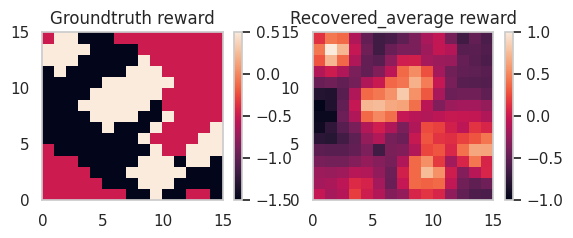

avr: 130.1163272167517
norm_avr: 0
each:
138.14438336187902
158.61118960728294
201.87226535587865
264.2700020200073
196.0541518099597
191.79039843100153
196.0541518099597
228.25
---------------------
77
avr: 128.9073905907154
norm_avr: 0
each:
136.4320438735532
162.0752810628281
199.13700787327875
264.1851466526166
197.29916734371227
191.82572936119777
197.29916734371227
228.25
---------------------
78
avr: 131.96824132456427
norm_avr: 0
each:
132.02119052196386
165.29623517543448
202.46726462147106
265.8066537496107
242.62910741412676
201.64409029652137
202.46726462147106
228.25
---------------------
79
avr: 121.87317106873388
norm_avr: 0
each:
130.6025100921993
166.75951827975342
198.50977124953718
261.7814968288762
118.27137878880444
175.1849350478341
166.75951827975342
228.25
---------------------
80
avr: 124.99131638293858
norm_avr: 0
each:
128.4143575381275
172.2168978152257
201.6545804119856
268.25204129208157
177.01266509664922
189.51010843081391
177.01266509664922
228.25
-----

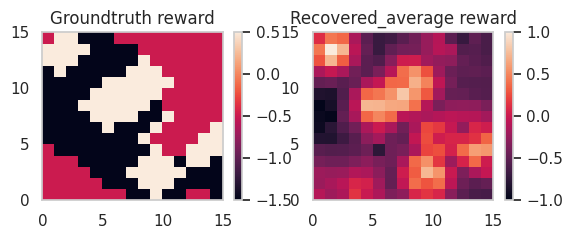

avr: 122.28253776855509
norm_avr: 0
each:
117.43742326003546
184.56286159988863
203.02228404327386
257.1021842945531
265.39481231718906
205.50391310298804
203.02228404327386
228.25
---------------------
88
avr: 114.82530339804028
norm_avr: 0
each:
114.51118458806681
182.29564513832435
202.9975683007704
265.58649678850486
139.96186890815807
181.0705527447649
182.29564513832435
228.25
---------------------
89
avr: 116.83992683124704
norm_avr: 0
each:
112.95821498250722
181.87785110471395
202.24894950439085
259.67027503310084
210.89892325078407
193.5308427750994
202.24894950439085
228.25
---------------------
90
avr: 116.74137382201462
norm_avr: 0
each:
110.85457320174376
182.66531776256917
202.34225361020535
255.4245567118241
221.47781585380352
194.55290342802917
202.34225361020535
228.25
---------------------
91
avr: 118.03671306182119
norm_avr: 0
each:
110.77711941542108
182.12705168080223
201.6324917493576
262.19542405200934
201.35060314997162
191.61653800951237
201.35060314997162
228

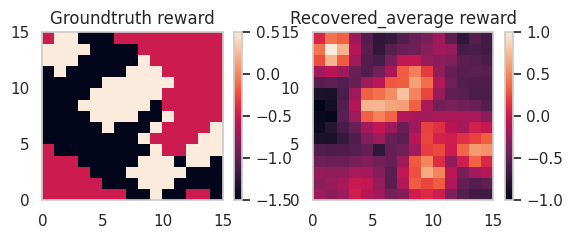

avr: 114.18348137029649
norm_avr: 0
each:
105.95990976130551
179.22795517017673
193.49273551911247
253.6597472330595
180.4671829354071
182.56150612381225
180.4671829354071
228.25
---------------------
99
avr: 115.25855104975632
norm_avr: 0
each:
106.67231849802805
176.83180589617405
195.401848349567
238.78566963018218
252.19251435258363
193.97683134530698
195.401848349567
228.25
---------------------
100
avr: 111.19526231937871
norm_avr: 0
each:
106.70102736695691
178.01888615201418
194.71016184306652
255.62280371930638
134.75261250258762
173.96109831678632
178.01888615201418
228.25
---------------------
101
avr: 114.30379529093146
norm_avr: 0
each:
103.21374336689033
177.77802234585783
196.50005575644516
237.35386830778046
206.24735810099654
184.21860957559406
196.50005575644516
228.25
---------------------
102
avr: 112.49724617089241
norm_avr: 0
each:
102.59589319621129
178.62568260707377
196.48336118155078
254.6701126174258
171.34346187760502
180.74370229597332
178.62568260707377
22

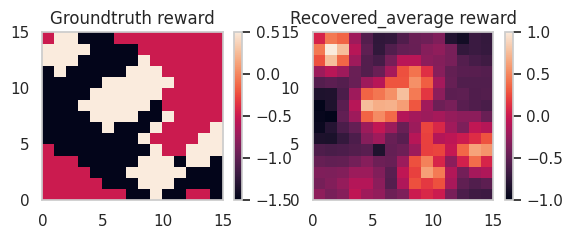

avr: 111.12143045466465
norm_avr: 0
each:
105.32590656337332
178.10345297081048
171.88610019427284
223.70347801421224
236.30463939105616
183.064715426745
178.10345297081048
228.25
---------------------
110
avr: 107.40008537351784
norm_avr: 0
each:
108.40052250021442
177.80927607773546
171.14199820435766
226.44525736592936
134.47384164816984
163.65417915928134
171.14199820435766
228.25
---------------------
111
avr: 109.93247940727193
norm_avr: 0
each:
105.09194780893266
178.29754020304367
172.21474629748738
238.15644273229015
196.55383067794088
178.06290154393895
178.29754020304367
228.25
---------------------
112
avr: 112.81133151772086
norm_avr: 0
each:
110.5777960548302
177.1697469799369
167.78883359321966
229.29965682176012
240.55838582538485
185.07888385502633
177.1697469799369
228.25
---------------------
113
avr: 106.83653942915375
norm_avr: 0
each:
113.71413626093852
177.74413265351996
168.9997810501605
238.35079583375426
146.19167248485928
169.0001036566465
168.9997810501605
2

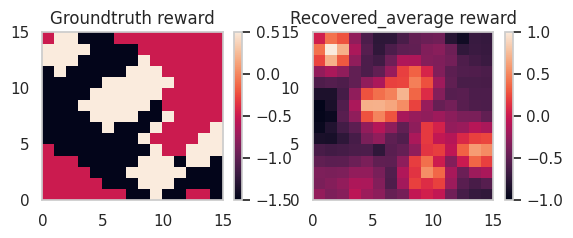

avr: 105.63306443217098
norm_avr: 0
each:
108.19328435292621
175.89692612908183
162.75168466173878
227.30093922109756
154.024818621604
165.63353059728968
162.75168466173878
228.25
---------------------
121
avr: 110.1057740637997
norm_avr: 0
each:
116.8056494870748
174.92909100473076
163.1111019076636
227.68300655538988
216.303327143813
179.7664352197344
174.92909100473076
228.25
---------------------
122
avr: 105.18748239577549
norm_avr: 0
each:
115.76966413483866
174.00852508589784
161.86224114662087
237.2976711575787
126.22222406007255
163.03206511700174
161.86224114662087
228.25
---------------------
123
avr: 106.8991124043006
norm_avr: 0
each:
106.74593800076431
181.64088819734053
162.27152543230798
227.66693778948957
173.02660113127988
170.27037811023646
173.02660113127988
228.25
---------------------
124
avr: 118.44987881634314
norm_avr: 0
each:
114.56731938040029
172.76949623396607
160.61765830928914
231.29412335899423
235.05263010893927
182.8602454783178
172.76949623396607
228.

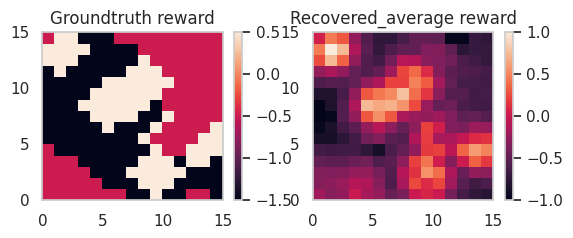

avr: 104.83745820290675
norm_avr: 0
each:
110.78003513010647
176.28019383704515
160.85967411155275
214.53124652687046
211.5904279582329
174.80831551276154
176.28019383704515
228.25
---------------------
132
avr: 106.1865432784667
norm_avr: 0
each:
116.65441792014967
175.33112873487906
155.28118647137853
224.43363107593106
126.20619407594664
159.581311655657
155.28118647137853
228.25
---------------------
133
avr: 126.66816978193802
norm_avr: 0
each:
122.39187474452308
183.22249783967666
158.37056806219897
214.83733060269225
156.14082455636225
166.99261916109063
158.37056806219897
228.25
---------------------
134
avr: 127.44706554527703
norm_avr: 0
each:
111.42150627848902
175.8803923030496
154.4122886634687
229.42732887458462
235.1325045018715
181.2548041242927
175.8803923030496
228.25
---------------------
135
avr: 109.71253194801189
norm_avr: 0
each:
119.47691144651768
183.91975631436625
155.59201532586337
212.50642692022927
109.64799968747622
156.22862193889057
155.59201532586337
22

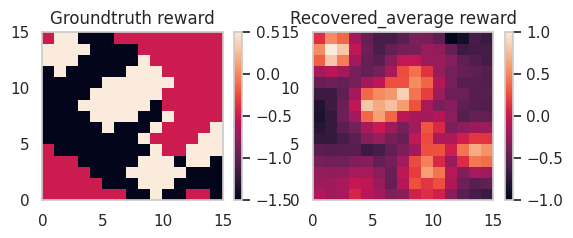

avr: 122.8275048890297
norm_avr: 0
each:
119.50934100037212
181.42861875768295
148.9839334343522
227.3844944801103
144.84052189748732
164.42938191400097
148.9839334343522
228.25
---------------------
143
avr: 117.21487896155757
norm_avr: 0
each:
106.19687079074481
176.83488467065655
152.96941702441688
205.56247199456323
177.33349574710988
163.77942804549826
176.83488467065655
228.25
---------------------
144
avr: 111.85845226000022
norm_avr: 0
each:
113.72334310512741
179.29233122048996
148.4957259864757
231.30402831455322
139.8704441908551
162.5371745635003
148.4957259864757
228.25
---------------------
145
avr: 171.54085108933847
norm_avr: 0
each:
165.87806903949686
174.77119589050864
154.35208788372478
205.9389483313499
203.42544453152667
180.87314913532137
174.77119589050864
228.25
---------------------
146
avr: 105.47613034994994
norm_avr: 0
each:
108.73504272185127
179.05092018854342
149.44205069348132
233.932340557072
112.25730812448819
156.68353245708724
149.44205069348132
228.

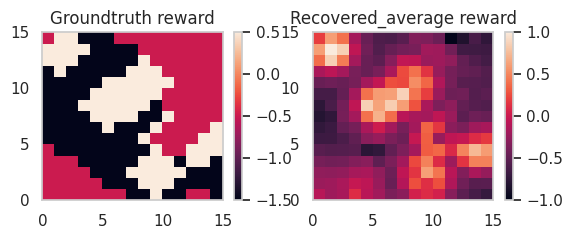

avr: 125.25458715472803
norm_avr: 0
each:
105.13718129015416
172.66644175857192
152.46783026760178
208.72867698415234
187.50292666799518
165.30061139369508
172.66644175857192
228.25
---------------------
154
avr: 114.55338936769078
norm_avr: 0
each:
152.14912572700604
177.24451960028398
142.1164832433131
240.63612523427463
113.47614045444664
165.12447885186486
152.14912572700604
228.25
---------------------
155
avr: 104.72815280438876
norm_avr: 0
each:
104.82272373438275
172.46199774526903
153.33794945872177
223.78540466768962
156.53620771871684
162.188856664956
156.53620771871684
228.25
---------------------
156
avr: 146.05596085368592
norm_avr: 0
each:
137.3910099934753
176.79211213897844
141.84639335667399
214.55443324108
170.2295532539682
168.1627003968352
170.2295532539682
228.25
---------------------
157
avr: 97.3124408052175
norm_avr: 0
each:
104.79664904275276
172.01169178854315
154.1605459574407
219.57659719665315
123.5269297856117
154.8144827542003
154.1605459574407
228.25
--

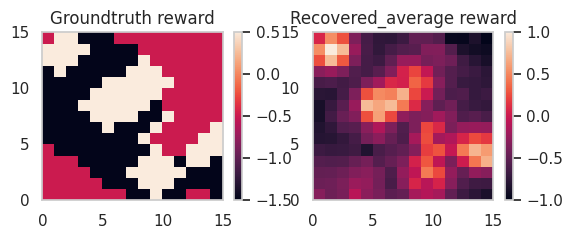

avr: 105.11257147703621
norm_avr: 0
each:
106.58466509853677
174.95784668007082
139.67516982527582
233.98642769288242
133.25509394634582
157.69184064862233
139.67516982527582
228.25
---------------------
165
avr: 130.26538225799388
norm_avr: 0
each:
150.85194659018168
168.8610720377486
152.46961720749687
200.84779286463154
171.1685764233989
168.83980102469152
168.8610720377486
228.25
---------------------
166
avr: 103.94107007192494
norm_avr: 0
each:
106.34365700779736
174.21510892062045
139.38327137174514
235.69355955883174
197.38692027785606
170.60450342737016
174.21510892062045
228.25
---------------------
167
avr: 103.70912974692601
norm_avr: 0
each:
137.20314590209412
168.42393533912673
150.5618730569987
202.71494371569602
125.04439807344143
156.7896592174714
150.5618730569987
228.25
---------------------
168
avr: 142.5218416295391
norm_avr: 0
each:
195.3480314696131
174.93175674582042
140.49422218475618
237.38807505498758
164.4193747679026
182.51629204461597
174.93175674582042
22

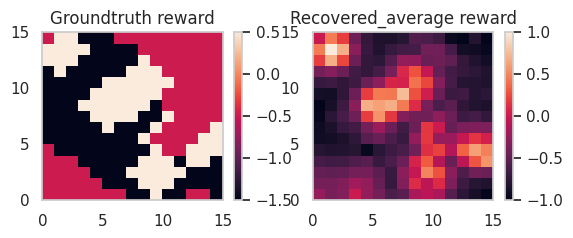

avr: 91.68065207323889
norm_avr: 0
each:
105.29996943934658
171.6303847228566
153.89977701510142
202.62525242272136
122.27916689353168
151.14691009871154
153.89977701510142
228.25
---------------------
176
avr: 141.42761240070655
norm_avr: 0
each:
140.72090801498038
176.4483200718025
140.20446840138257
237.19409405344697
168.1700422720923
172.54756656274094
168.1700422720923
228.25
---------------------
177
avr: 92.00334449801302
norm_avr: 0
each:
105.19927418214219
170.9281951837539
154.62535921084893
204.4995514860121
115.80428012358493
150.21133203726842
154.62535921084893
228.25
---------------------
178
avr: 116.7743560654338
norm_avr: 0
each:
135.70479324831652
174.97778431918414
140.76003954910834
235.48885274579376
160.2452325870784
169.43534048989622
160.2452325870784
228.25
---------------------
179
avr: 153.6625503701706
norm_avr: 0
each:
199.60932885001841
170.2817267024536
152.0351340203745
206.16289533643894
166.42198203837057
178.9022133895312
170.2817267024536
228.25
--

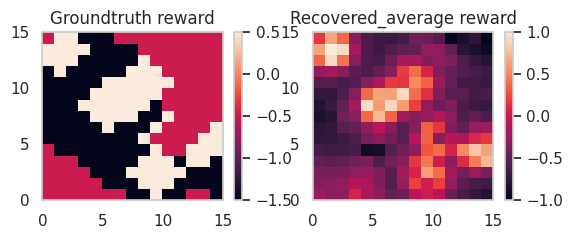

avr: 109.83529720436246
norm_avr: 0
each:
105.33759625993893
169.5833634062494
140.07858976215059
236.07699542187265
181.7213252528398
166.55957402061028
169.5833634062494
228.25
---------------------
187
avr: 120.57810645401625
norm_avr: 0
each:
146.4511945870982
175.26009202896483
155.58531855966967
223.89342250433043
170.9701289550653
174.4320313270257
170.9701289550653
228.25
---------------------
188
avr: 113.16832083335919
norm_avr: 0
each:
105.83619809292257
172.8329891178104
140.8247869129001
241.33329631509275
172.35305824760886
166.63606573726693
172.35305824760886
228.25
---------------------
189
avr: 122.14212775916424
norm_avr: 0
each:
155.43084859641505
173.92540870711431
156.24730386744162
217.38356472307444
171.93822606159983
174.98507039112906
171.93822606159983
228.25
---------------------
190
avr: 104.31255472971877
norm_avr: 0
each:
105.90687976550392
174.8141097433034
140.86884243627324
239.235665106315
131.11942133268562
158.38898367681622
140.86884243627324
228.2

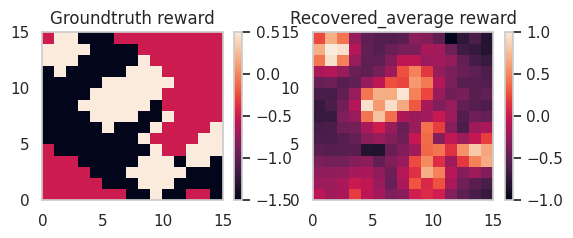

avr: 125.51470951936508
norm_avr: 0
each:
106.0093113730656
173.67166145340056
156.68183087296853
219.5483412523479
207.95681056250618
172.77359110285775
173.67166145340056
228.25
---------------------
198
avr: 111.44737345512874
norm_avr: 0
each:
173.34590092052017
174.2573059621808
140.8283375450217
238.6327954647696
121.82648072578691
169.77816412365584
173.34590092052017
228.25
---------------------
199
avr: 115.84548720733058
norm_avr: 0
each:
105.24976811305017
170.14872866972786
157.52043501209405
225.75834082683414
202.2881309399961
172.19308071234047
170.14872866972786
228.25
---------------------
200
avr: 113.81344869788303
norm_avr: 0
each:
160.4720849385047
174.82896869928496
141.4863945935293
245.67254010722223
139.96602726914577
172.48520312153738
160.4720849385047
228.25
---------------------
201
avr: 122.35713326455148
norm_avr: 0
each:
105.47581243958325
170.62583869531156
157.62263667722948
220.51002867458956
220.80368044455165
175.0075993862531
170.62583869531156
228

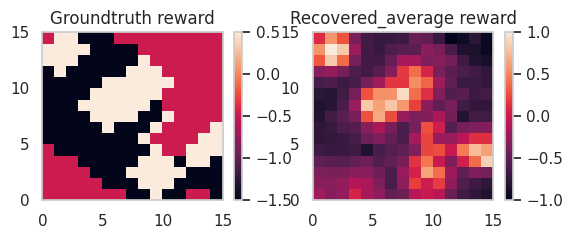

avr: 104.03723042014582
norm_avr: 0
each:
146.95182371667042
177.1436089523749
142.36191621589566
241.06290190079542
119.70550720360698
165.4451515978687
146.95182371667042
228.25
---------------------
209
avr: 121.36716114593838
norm_avr: 0
each:
127.97035609714479
168.74268710579614
145.10731049464275
227.36955840797788
163.6319719358991
166.56437680829214
163.6319719358991
228.25
---------------------
210
avr: 148.0115230275446
norm_avr: 0
each:
231.44290574059303
172.70153176732939
140.72540146303575
246.63449667588594
118.64962814963914
182.03079275929665
172.70153176732939
228.25
---------------------
211
avr: 121.52602710361245
norm_avr: 0
each:
123.7028059785365
167.19536355415235
137.07256295279018
220.75023586240908
177.82236411496706
165.30866649257104
167.19536355415235
228.25
---------------------
212
avr: 145.19502404528225
norm_avr: 0
each:
223.19667680226115
173.79514043703145
135.61834568694692
243.7524422544333
122.22715497871262
179.71795203187708
173.79514043703145


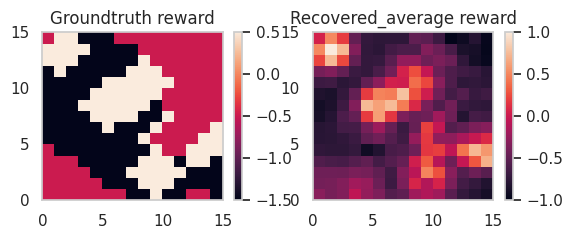

avr: 93.85133361747978
norm_avr: 0
each:
109.90952621730209
174.15532765016823
129.8998942036898
221.35916375049908
125.82538548099808
152.22985946053146
129.8998942036898
228.25
---------------------
220
avr: 178.93900134265263
norm_avr: 0
each:
181.70594916826516
170.0589300345859
150.85332387461506
247.04838402075723
222.58370845848503
194.4500591113417
181.70594916826516
228.25
---------------------
221
avr: 92.67270404529289
norm_avr: 0
each:
107.64729996405669
176.1545583534966
130.31886562281207
220.33534424458372
132.13900404934208
153.31901444685823
132.13900404934208
228.25
---------------------
222
avr: 176.58581601333964
norm_avr: 0
each:
171.09856294596963
168.55559856561595
151.31772579672523
245.9875175960236
231.43237559613019
193.6783561000929
171.09856294596963
228.25
---------------------
223
avr: 90.08297663972115
norm_avr: 0
each:
106.59992078854114
179.53736993996893
132.40097368880552
219.35408705080144
123.67562135416145
152.31359456445568
132.40097368880552
228

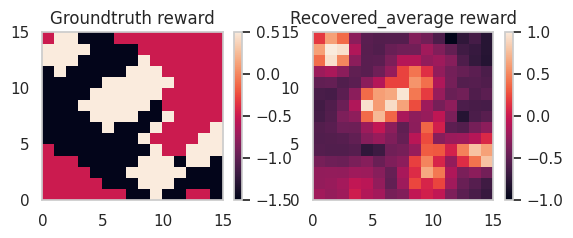

avr: 120.679323929952
norm_avr: 0
each:
148.48759682075493
175.0733926122376
154.14486103976859
247.39854074973744
139.5681350459196
172.93450525368362
154.14486103976859
228.25
---------------------
231
avr: 143.33005269689806
norm_avr: 0
each:
182.84795803456876
167.53861423984455
132.25741950268628
220.71385376971182
217.55990595892195
184.18355030114668
182.84795803456876
228.25
---------------------
232
avr: 98.73154556817711
norm_avr: 0
each:
108.27652137844338
173.96703887268652
154.57391669004483
245.25114096513767
121.56713945141142
160.72715147154477
154.57391669004483
228.25
---------------------
233
avr: 140.80866399982415
norm_avr: 0
each:
177.40396179989125
167.8160657396924
132.52475136385146
218.45308617120725
203.92979441960702
180.02553189884986
177.40396179989125
228.25
---------------------
234
avr: 97.73473586516798
norm_avr: 0
each:
107.21167841525155
175.0144104566578
154.4775639381403
244.17606939057924
118.8249323514058
159.94093091040693
154.4775639381403
228.

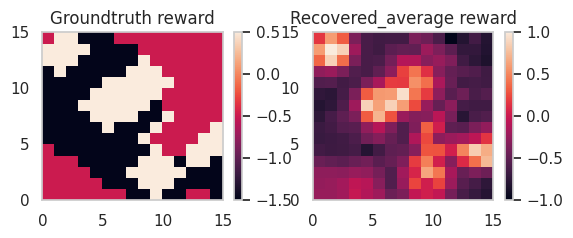

avr: 107.74740562962583
norm_avr: 0
each:
151.30796658410583
165.91065632732975
132.27535816433442
203.10863822404943
114.23059704641275
153.36664326924642
151.30796658410583
228.25
---------------------
242
avr: 126.57397493568513
norm_avr: 0
each:
108.49121624737484
175.15609664398158
154.59120688132668
229.40959369106474
172.58057903739402
168.04573850022837
172.58057903739402
228.25
---------------------
243
avr: 108.48687271067863
norm_avr: 0
each:
172.1163170579017
176.0459051468216
135.49510679092947
202.71724593908456
108.82372118114624
159.03965922317673
172.1163170579017
228.25
---------------------
244
avr: 122.99854239684272
norm_avr: 0
each:
107.34844978108782
169.84272967161098
157.0218473016899
229.08611709527375
155.05893256440376
163.67161528281324
157.0218473016899
228.25
---------------------
245
avr: 113.85253333350884
norm_avr: 0
each:
161.5892055474038
179.59739238383955
134.4295401420846
202.27500060666688
122.61022378951367
160.10027249390168
161.5892055474038
2

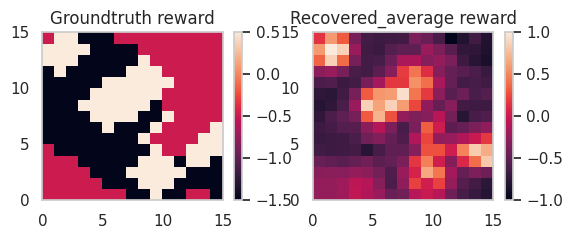

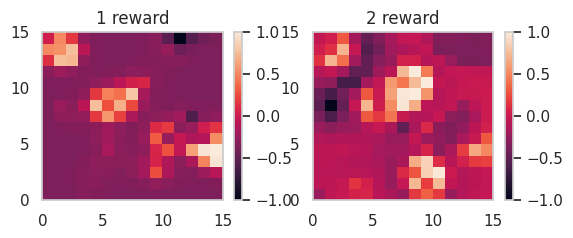

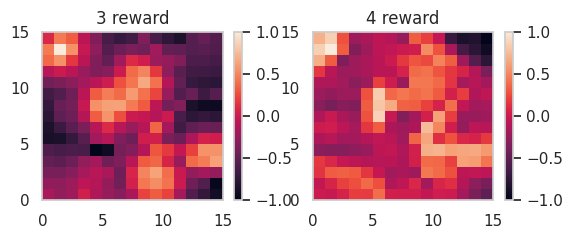

avr: 105.86130238004614
norm_avr: 0
each:
147.724619324435
163.4146507374651
134.03436483818444
207.9702715515736
105.7594153013713
151.7806643506059
147.724619324435
228.25
---------------------


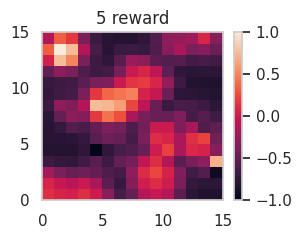

In [14]:
if __name__ == '__main__': 
    main10(grid_size= 15, 
         discount= 0.90, 
         n_objects= 25, 
         n_colours= 2, 
         n_trajectories= 13, 
         epochs= 250, 
         learning_rate= 0.01, 
         structure= (3, 3),tra = tra)
# (grid_size, discount, n_objects, n_colours, n_trajectories
# , epochs,learning_rate, structure)

In [6]:
#situation that showed averaging perform better than only increase epochs
#1. less object: less object makes more 0, which dont need to be updated
#2. less trajectories: no much information to gain

In [7]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# # Creating x-axis values (assuming equal intervals)
# x_values = range(len(avr_arr))

# # Setting the style for seaborn (optional)
# sns.set(style="whitegrid")

# # Plotting the lines using seaborn
# sns.lineplot(x=x_values, y=arr1, alpha=0.5, color='grey')  # Adjust alpha value to change transparency
# sns.lineplot(x=x_values, y=arr2, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr3, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr4, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr5, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr6, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr7, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr8, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr9, alpha=0.5, color='grey')
# sns.lineplot(x=x_values, y=arr10, label='Line 1 to 10', alpha=0.5, color='grey')

# # Customizing the appearance of 'avr_arr' line to highlight it
# sns.lineplot(x=x_values, y=arr_mean, label='mean', color='green', linewidth=2)
# sns.lineplot(x=x_values, y=arr_median, label='median',color='blue', linewidth=2)
# sns.lineplot(x=x_values, y=avr_arr, label='avr', color='red', linestyle='--', linewidth=2)  # Adjust color, linestyle, and linewidth as desired
# # sns.lineplot(x=x_values, y=arr_norm_avr, label='normed_avr',color='orange', linewidth=1)
# # Adding labels and title
# plt.xlabel('Sum of Square Error')
# plt.ylabel('epoches')
# plt.title('Loss change compare')

# # Displaying the plot
# plt.legend()
# plt.tight_layout()

# folder = 0
# num = 0
# while True:
#     folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
#     if not folder_exist:
#         break
#     num += 1
# plt.savefig(f'fig/Compare_10_norm{num}.png',dpi=300)

# plt.show()

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# # Define the interval for sampling the x-axis
# interval = 5

# # Creating x-axis values with larger intervals between data points
# x_values = range(0, len(avr_arr), interval)

# # Setting the style for seaborn (optional)
# sns.set(style="whitegrid")

# plt.figure(figsize=(10, 6))

# # Plotting the lines using seaborn with more vibrant colors and improved readability
# for i in range(1, 11):
#     sns.lineplot(x=x_values, y=locals()[f"arr{i}"][::interval], alpha=0.5, label=f'Line {i}', linewidth=1)

# # Customizing the appearance of 'avr_arr' line to highlight it
# sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean', color='green', linewidth=2)
# sns.lineplot(x=x_values, y=arr_median[::interval], label='Median', color='blue', linewidth=2)
# sns.lineplot(x=x_values, y=avr_arr[::interval], label='Average', color='red', linestyle='--', linewidth=2)

# # Adding labels and title with a slightly larger font size for better readability
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Sum of Square Error', fontsize=12)
# plt.title('Comparison of Loss Changes', fontsize=14)

# # Improving legend placement and appearance
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Saving the plot with a more systematic naming convention
# folder = 0
# num = 0
# while True:
#     folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
#     if not folder_exist:
#         break
#     num += 1
# plt.savefig(f'fig/Compare_10_norm{num}.png', dpi=300)

# # Displaying the plot
# plt.show()


In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os

# # Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# # Define the interval for sampling the x-axis
# interval = 5

# # Creating x-axis values with larger intervals between data points
# x_values = range(0, len(avr_arr), interval)

# # Setting the style for seaborn (optional)
# sns.set(style="whitegrid")

# plt.figure(figsize=(10, 6))

# # Plotting the lines using seaborn with more vibrant colors and improved readability
# for i in range(1, 11):
#     sns.lineplot(x=x_values, y=locals()[f"arr{i}"][::interval], alpha=0.5, label=f'Line {i}', linewidth=1)

# # Customizing the appearance of 'avr_arr' line to highlight it
# sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean', color='green', linewidth=2)
# sns.lineplot(x=x_values, y=arr_median[::interval], label='Median', color='blue', linewidth=2)
# sns.lineplot(x=x_values, y=avr_arr[::interval], label='Average', color='red', linestyle='--', linewidth=2)

# # Adding a horizontal line at y=141 to represent the ground truth baseline
# plt.axhline(y=141, color='black', linestyle=':', label="0 Matrix's loss", linewidth=2)

# # Adding labels and title with a slightly larger font size for better readability
# plt.xlabel('Epochs', fontsize=12)
# plt.ylabel('Sum of Square Error', fontsize=12)
# plt.title('Comparison of Loss Changes', fontsize=14)

# # Improving legend placement and appearance
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

# # Saving the plot with a more systematic naming convention
# folder = 0
# num = 0
# while True:
#     folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
#     if not folder_exist:
#         break
#     num += 1
# plt.savefig(f'fig/Compare_10_norm{num}.png', dpi=300)

# # Displaying the plot
# plt.show()

# percentage_improvement = ((arr_mean[249] - avr_arr[249]) / arr_mean[249]) * 100
# print(percentage_improvement)

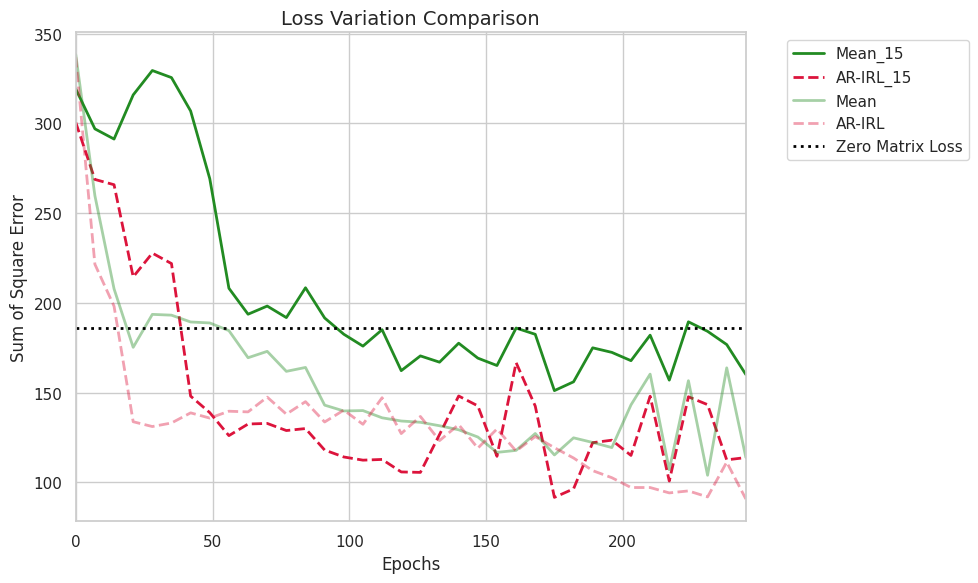

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Your data for the lines (assuming 'avr_arr', 'arr1', 'arr2', 'arr3', 'arr4' are defined)

# Define the interval for sampling the x-axis
interval = 7

# Creating x-axis values with larger intervals between data points
x_values = range(0, len(avr_arr), interval)

# Setting the style for seaborn (optional)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Plotting the lines using seaborn with more vibrant colors and improved readability
# for i in range(1, 6):
#     sns.lineplot(x=x_values, y=locals()[f"arr{i}"][::interval], alpha=0.4, label=f'Line {i}', linewidth=1)

# Customizing the appearance of 'avr_arr' line to highlight it
# sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean', color='forestgreen', linewidth=2,alpha=0.4)
# sns.lineplot(x=x_values, y=arr_median[::interval], label='Median', color='dodgerblue', linewidth=2,alpha=0.4)
# sns.lineplot(x=x_values, y=avr_arr[::interval], label='AR-IRL', color='crimson', linestyle='--', linewidth=2,alpha=0.4)
sns.lineplot(x=x_values, y=arr_mean[::interval], label='Mean_15', color='forestgreen', linewidth=2)
sns.lineplot(x=x_values, y=avr_arr[::interval], label='AR-IRL_15', color='crimson', linestyle='--', linewidth=2)

sns.lineplot(x=x_values, y=arr_mean1[::interval], label='Mean', color='forestgreen', linewidth=2,alpha=0.4)
sns.lineplot(x=x_values, y=avr_arr1[::interval], label='AR-IRL', color='crimson', linestyle='--', linewidth=2,alpha=0.4)

# sns.lineplot(x=x_values, y=arr_mean2[::interval], label='Mean', color='forestgreen', linewidth=2,alpha=0.4)
# sns.lineplot(x=x_values, y=avr_arr2[::interval], label='AR-IRL', color='crimson', linestyle='--', linewidth=2,alpha=0.4)

# sns.lineplot(x=x_values, y=arr_mean1[::interval], label='Mean_different_trajectories', color='forestgreen', linewidth=2)
# sns.lineplot(x=x_values, y=avr_arr1[::interval], label='AR-IRL_different_trajectories', color='crimson', linestyle='--', linewidth=2)

# sns.lineplot(x=x_values, y=arr_mean3[::interval], label='Mean_different_trajectories', color='forestgreen', linewidth=2)
# sns.lineplot(x=x_values, y=avr_arr3[::interval], label='AR-IRL_different_trajectories', color='crimson', linestyle='--', linewidth=2)

# Adding a horizontal line at y=141 to represent the ground truth baseline
plt.axhline(y=186.25, color='black', linestyle=':', label="Zero Matrix Loss", linewidth=2)

# Setting x-axis limits from 0 to the maximum value of x_values
plt.xlim(0, max(x_values))

# Adding labels and title with a slightly larger font size for better readability
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Sum of Square Error', fontsize=12)
plt.title('Loss Variation Comparison', fontsize=14)

# Improving legend placement and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Saving the plot with a more systematic naming convention
folder = 0
num = 0
while True:
    folder_exist = os.path.exists(f'fig/Compare_10_norm{num}.png')
    if not folder_exist:
        break
    num += 1
plt.savefig(f'fig/Compare_un_normalize{num}.png', dpi=300)

# Displaying the plot
plt.show()

# percentage_improvement = ((arr_mean[249] - avr_arr[249]) / arr_mean[249]) * 100
# print(percentage_improvement)

# percentage_improvement = ((arr_median[249] - avr_arr[249]) / arr_median[249]) * 100
# print(percentage_improvement)

# percentage_improvement = ((arr_meann[249] - avr_arrn[249]) / arr_meann[249]) * 100
# print(percentage_improvement)

# percentage_improvement = ((arr_mediann[249] - avr_arrn[249]) / arr_mediann[249]) * 100
# print(percentage_improvement)

# print('decline')
# percentage_improvement = ((avr_arr[249] - avr_arrn[249]) / avr_arr[249]) * 100
# print(percentage_improvement)


In [ ]:
mean:26.570144656267175, 22.39612092381415, 32.4627307708223, 16.770773776578682, 18.168403533389956, 15.951170489004532, 31.22368092773443, 30.020025100283966
median:19.192288803045614, 21.136682924520617, -2.552779648560273, 9.957056965556731, 23.89960891422803, 15.689657781468464, 30.639300383244095, 19.660431528571856

In [ ]:
policy = find_policy(ow.n_states, ow.n_actions, ow.transition_probability,
                         ground_r, ow.discount, stochastic=False)
tra = ow.generate_trajectories(40,8,lambda s: policy[s])
tra

In [ ]:
(26.570144656267175+ 22.39612092381415+ 32.4627307708223+16.770773776578682+ 18.168403533389956)/5

In [ ]:
(19.192288803045614+ 21.136682924520617+ -2.552779648560273+ 9.957056965556731+ 23.89960891422803)/5

In [ ]:
(26.570144656267175, 22.39612092381415, 32.4627307708223, 16.770773776578682, 18.168403533389956, 15.951170489004532, 31.22368092773443, 30.020025100283966)/8

In [11]:
arr_mean1 = arr_mean# 75 ton
avr_arr1 = avr_arr

In [ ]:
arr_mean2 = arr_mean# 40 同
avr_arr2 = avr_arr

In [ ]:
arr_mean3 = arr_mean# 8 不同
avr_arr3 = avr_arr

In [ ]:
#在同样set里抽取
arr_mean4 = arr_mean# 8 不同
avr_arr4 = avr_arr

In [ ]:
arr_mean5 = arr_mean# 8 不同
avr_arr5 = avr_arr